In [6]:
%run read_data.ipynb

In [7]:
script_dir = os.path.dirname('__file__')
results_dir4 = os.path.join(script_dir, 'Block_density/')
if not os.path.isdir(results_dir4):
    os.makedirs(results_dir4)
    
results_dir5 = os.path.join(script_dir, 'Block_CDF/')
if not os.path.isdir(results_dir5):
    os.makedirs(results_dir5)
    
results_dir6 = os.path.join(script_dir, 'Block_count/')
if not os.path.isdir(results_dir6):
    os.makedirs(results_dir6)
    
results_dir7 = os.path.join(script_dir, 'Block_box/')
if not os.path.isdir(results_dir7):
    os.makedirs(results_dir7)

In [8]:
%run functionv3.ipynb

35.21023748599691


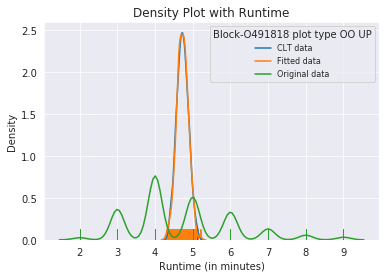

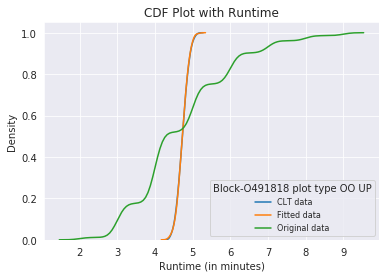

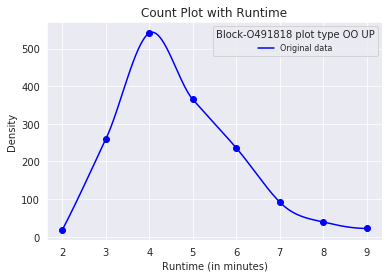

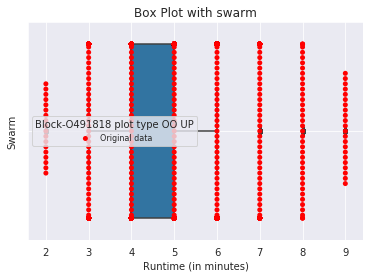

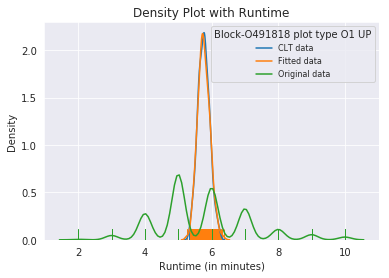

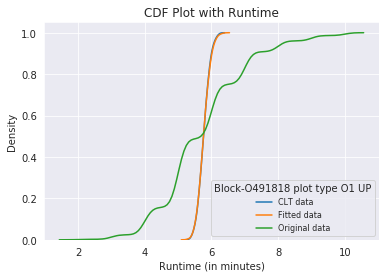

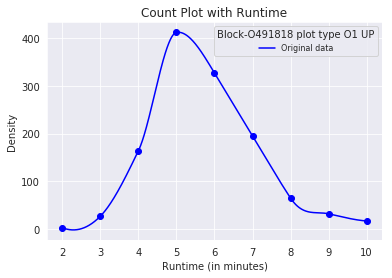

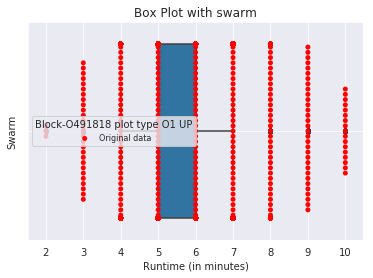

In [18]:
import timeit
start_time = timeit.default_timer()


import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

f = open("Block_data_length.txt", "a")
for i in range(8):
    for j in range(3,61):
        data1 = rt_names[i].iloc[:,j]
        #data0 = data1.iloc[:,1]
        original_data1 = [k for k in data1 if str(k) != 'nan']
        if (len(original_data1)<30):
            continue
        original_data = outlier(original_data1)
        if (len(original_data)<150):
            data2 = clt_conversion_10_per_org(data1)
        else:
            data2 = clt_conversion_10_per_150_org(data1)
        data = outlier(data2)
        if (len(data)<30):
            print(str(j-2)+' '+str(plot_type[i])+" Less 30",file=f)
            continue
        print(str(j-2)+' '+str(plot_type[i])+"  Length of data=",len(data),file=f)
        t_dist = stats.t
        par_est = t_dist.fit(data)
        generated_data = t_dist.rvs(*par_est[:-2], loc=par_est[-2], scale=par_est[-1], size=len(data))
        density_plot_block(data,original_data,generated_data,i,j)
        cdf_plot_block(data,original_data,generated_data,i,j)
        count_plot_block(data,original_data,generated_data,i,j)
        box_plot_block(data,original_data,generated_data,i,j) 
f.close()
elapsed = timeit.default_timer() - start_time
print(elapsed)

In [4]:
writer = pd.ExcelWriter('estimated_runtime.xlsx', engine='xlsxwriter')
types = ['_up_00','_up_01','_up_10','_up_11','_dn_00','_dn_01','_dn_10','_dn_11']
for i in range(8):
    pd.DataFrame({'Block':column1,'Run_time':runtime_block[i]}).to_excel(writer, sheet_name='runtime'+str(types[i]), index=False)
writer.save()